# Exercise 2

In [1]:
import pandas as pd
import numpy as np
import os 
import glob

In [2]:
train_path = 'data/train'
test_path = 'data/test'
train_df = pd.DataFrame()
test_df = pd.DataFrame()

In [3]:
classes = os.listdir(train_path)
classes

['business', 'entertainment', 'politics', 'sport', 'tech']

# 1- Importing Data and Building DataFrames

In [4]:
for class_elem in classes:
    class_path_train = train_path + f'/{class_elem}'
    class_path_test = test_path + f'/{class_elem}'
    
    # train 
    passage_l = []
    for txtPath in glob.glob(os.path.join(class_path_train, '*.txt')):
        txt = open(txtPath).read()
        passage_l.append(txt)
    data = {'reading_passage': passage_l, 'passage_topic': class_elem}
    df_part = pd.DataFrame(data)
    train_df = train_df.append(df_part)
    
    # test 
    passage_l = []
    for txtPath in glob.glob(os.path.join(class_path_test, '*.txt')):
        txt = open(txtPath).read()
        passage_l.append(txt)
    data = {'reading_passage': passage_l, 'passage_topic': class_elem}
    df_part = pd.DataFrame(data)
    test_df = test_df.append(df_part)

train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)   

In [5]:
train_df

,reading_passage,passage_topic
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business
...,...,...
1970,"Cebit opens to mobile music tune\n\nCebit, the...",tech
1971,Game makers get Xbox 2 sneak peek\n\nMicrosoft...,tech
1972,Broadband set to revolutionise TV\n\nBT is sta...,tech
1973,Chip maker backs net phone calls\n\nRich Templ...,tech


# 2- Data Cleaning and Preprocessing

### 2.1 encoding class label

In [6]:
def encode_class(df, label):
    class_mappings = {'business':0, 'entertainment': 1, 'politics': 2, 'sport': 3, 'tech': 4}
    df[label] = df[label].map(class_mappings)
    return df

train_df = encode_class(train_df, 'passage_topic')
test_df = encode_class(test_df, 'passage_topic')
test_df

,reading_passage,passage_topic
0,Beijingers fume over parking fees\n\nChoking t...,0
1,GM issues 2005 profits warning\n\nGeneral Moto...,0
2,US economy still growing says Fed\n\nMost area...,0
3,Wall Street cool to eBay's profit\n\nShares in...,0
4,WorldCom trial starts in New York\n\nThe trial...,0
...,...,...
245,BT program to beat dialler scams\n\nBT is intr...,4
246,Spam e-mails tempt net shoppers\n\nComputer us...,4
247,Be careful how you code\n\nA new European dire...,4
248,US cyber security chief resigns\n\nThe man mak...,4


### 2.2 - text preprocessing

In [7]:
cleaned_train_df = train_df.copy()
cleaned_test_df = test_df.copy()

main_column_transformations = ['reading_passage']

#### 2.2.1 replacing new lines with blank spaces

In [8]:
cleaned_train_df['no_new_line'] = cleaned_train_df[main_column_transformations[-1]].apply(lambda x: x.replace('\n', ' '))
cleaned_test_df['no_new_line'] = cleaned_test_df[main_column_transformations[-1]].apply(lambda x: x.replace('\n', ' '))
main_column_transformations.append('no_new_line')
cleaned_train_df.head()

,reading_passage,passage_topic,no_new_line
0,Ad sales boost Time Warner profit\n\nQuarterly...,0,Ad sales boost Time Warner profit Quarterly p...
1,Dollar gains on Greenspan speech\n\nThe dollar...,0,Dollar gains on Greenspan speech The dollar h...
2,Yukos unit buyer faces loan claim\n\nThe owner...,0,Yukos unit buyer faces loan claim The owners ...
3,High fuel prices hit BA's profits\n\nBritish A...,0,High fuel prices hit BA's profits British Air...
4,Pernod takeover talk lifts Domecq\n\nShares in...,0,Pernod takeover talk lifts Domecq Shares in U...


#### 2.2.2 removing punctuation

we found that removing punctuation reduced the accuracy score of the model, which indicates possible information loss, so we're not going to remove punctuation words

In [9]:
# import string

# def remove_punctuation(text):
#     punctuationfree="".join([i for i in text if i not in string.punctuation])
#     return punctuationfree

# cleaned_train_df['no_punctuation']= cleaned_train_df[main_column_transformations[-1]].apply(lambda x:remove_punctuation(x))
# cleaned_test_df['no_punctuation']= cleaned_test_df[main_column_transformations[-1]].apply(lambda x:remove_punctuation(x))
# main_column_transformations.append('no_punctuation')
# cleaned_train_df.head()

#### 2.2.3 converting to lower case

In [10]:
cleaned_train_df['lower_case']= cleaned_train_df[main_column_transformations[-1]].apply(lambda x: x.lower())
cleaned_test_df['lower_case']= cleaned_test_df[main_column_transformations[-1]].apply(lambda x: x.lower())
main_column_transformations.append('lower_case')
cleaned_train_df.head()

,reading_passage,passage_topic,no_new_line,lower_case
0,Ad sales boost Time Warner profit\n\nQuarterly...,0,Ad sales boost Time Warner profit Quarterly p...,ad sales boost time warner profit quarterly p...
1,Dollar gains on Greenspan speech\n\nThe dollar...,0,Dollar gains on Greenspan speech The dollar h...,dollar gains on greenspan speech the dollar h...
2,Yukos unit buyer faces loan claim\n\nThe owner...,0,Yukos unit buyer faces loan claim The owners ...,yukos unit buyer faces loan claim the owners ...
3,High fuel prices hit BA's profits\n\nBritish A...,0,High fuel prices hit BA's profits British Air...,high fuel prices hit ba's profits british air...
4,Pernod takeover talk lifts Domecq\n\nShares in...,0,Pernod takeover talk lifts Domecq Shares in U...,pernod takeover talk lifts domecq shares in u...


#### 2.2.4 tokenization

In [11]:
import re

def tokenization(text):
    tokens = re.split('W+',text)
    return tokens

cleaned_train_df['tokenization']= cleaned_train_df[main_column_transformations[-1]].apply(lambda x: tokenization(x))
cleaned_test_df['tokenization']= cleaned_test_df[main_column_transformations[-1]].apply(lambda x: tokenization(x))
main_column_transformations.append('tokenization')
cleaned_train_df.head()

,reading_passage,passage_topic,no_new_line,lower_case,tokenization
0,Ad sales boost Time Warner profit\n\nQuarterly...,0,Ad sales boost Time Warner profit Quarterly p...,ad sales boost time warner profit quarterly p...,[ad sales boost time warner profit quarterly ...
1,Dollar gains on Greenspan speech\n\nThe dollar...,0,Dollar gains on Greenspan speech The dollar h...,dollar gains on greenspan speech the dollar h...,[dollar gains on greenspan speech the dollar ...
2,Yukos unit buyer faces loan claim\n\nThe owner...,0,Yukos unit buyer faces loan claim The owners ...,yukos unit buyer faces loan claim the owners ...,[yukos unit buyer faces loan claim the owners...
3,High fuel prices hit BA's profits\n\nBritish A...,0,High fuel prices hit BA's profits British Air...,high fuel prices hit ba's profits british air...,[high fuel prices hit ba's profits british ai...
4,Pernod takeover talk lifts Domecq\n\nShares in...,0,Pernod takeover talk lifts Domecq Shares in U...,pernod takeover talk lifts domecq shares in u...,[pernod takeover talk lifts domecq shares in ...


#### 2.2.5 removing stopwords

In [12]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

cleaned_train_df['no_stopwords']= cleaned_train_df[main_column_transformations[-1]].apply(lambda x:remove_stopwords(x))
cleaned_test_df['no_stopwords']= cleaned_test_df[main_column_transformations[-1]].apply(lambda x:remove_stopwords(x))
main_column_transformations.append('no_stopwords')
cleaned_train_df.head()

,reading_passage,passage_topic,no_new_line,lower_case,tokenization,no_stopwords
0,Ad sales boost Time Warner profit\n\nQuarterly...,0,Ad sales boost Time Warner profit Quarterly p...,ad sales boost time warner profit quarterly p...,[ad sales boost time warner profit quarterly ...,[ad sales boost time warner profit quarterly ...
1,Dollar gains on Greenspan speech\n\nThe dollar...,0,Dollar gains on Greenspan speech The dollar h...,dollar gains on greenspan speech the dollar h...,[dollar gains on greenspan speech the dollar ...,[dollar gains on greenspan speech the dollar ...
2,Yukos unit buyer faces loan claim\n\nThe owner...,0,Yukos unit buyer faces loan claim The owners ...,yukos unit buyer faces loan claim the owners ...,[yukos unit buyer faces loan claim the owners...,[yukos unit buyer faces loan claim the owners...
3,High fuel prices hit BA's profits\n\nBritish A...,0,High fuel prices hit BA's profits British Air...,high fuel prices hit ba's profits british air...,[high fuel prices hit ba's profits british ai...,[high fuel prices hit ba's profits british ai...
4,Pernod takeover talk lifts Domecq\n\nShares in...,0,Pernod takeover talk lifts Domecq Shares in U...,pernod takeover talk lifts domecq shares in u...,[pernod takeover talk lifts domecq shares in ...,[pernod takeover talk lifts domecq shares in ...


#### 2.2.6 lemmentization

In [13]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

wordnet_lemmatizer = WordNetLemmatizer()
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text
cleaned_train_df['lemmentization'] = cleaned_train_df[main_column_transformations[-1]].apply(lambda x:lemmatizer(x))
cleaned_test_df['lemmentization'] = cleaned_test_df[main_column_transformations[-1]].apply(lambda x:lemmatizer(x))
main_column_transformations.append('lemmentization')
cleaned_train_df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\modaj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\modaj\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,reading_passage,passage_topic,no_new_line,lower_case,tokenization,no_stopwords,lemmentization
0,Ad sales boost Time Warner profit\n\nQuarterly...,0,Ad sales boost Time Warner profit Quarterly p...,ad sales boost time warner profit quarterly p...,[ad sales boost time warner profit quarterly ...,[ad sales boost time warner profit quarterly ...,[ad sales boost time warner profit quarterly ...
1,Dollar gains on Greenspan speech\n\nThe dollar...,0,Dollar gains on Greenspan speech The dollar h...,dollar gains on greenspan speech the dollar h...,[dollar gains on greenspan speech the dollar ...,[dollar gains on greenspan speech the dollar ...,[dollar gains on greenspan speech the dollar ...
2,Yukos unit buyer faces loan claim\n\nThe owner...,0,Yukos unit buyer faces loan claim The owners ...,yukos unit buyer faces loan claim the owners ...,[yukos unit buyer faces loan claim the owners...,[yukos unit buyer faces loan claim the owners...,[yukos unit buyer faces loan claim the owners...
3,High fuel prices hit BA's profits\n\nBritish A...,0,High fuel prices hit BA's profits British Air...,high fuel prices hit ba's profits british air...,[high fuel prices hit ba's profits british ai...,[high fuel prices hit ba's profits british ai...,[high fuel prices hit ba's profits british ai...
4,Pernod takeover talk lifts Domecq\n\nShares in...,0,Pernod takeover talk lifts Domecq Shares in U...,pernod takeover talk lifts domecq shares in u...,[pernod takeover talk lifts domecq shares in ...,[pernod takeover talk lifts domecq shares in ...,[pernod takeover talk lifts domecq shares in ...


In [14]:
main_column_transformations

['reading_passage',
 'no_new_line',
 'lower_case',
 'tokenization',
 'no_stopwords',
 'lemmentization']

#### stemming (not required)

the problem with stemming is that it stems the words such that its root form loses the meaning or it is not diminished to a proper English word. so we used lemmentization instead

In [15]:
# from nltk.stem.porter import PorterStemmer

# porter_stemmer = PorterStemmer()
# def stemming(text):
#     stem_text = [porter_stemmer.stem(word) for word in text]
#     return stem_text
# cleaned_train_df['reading_passage'] = cleaned_train_df['reading_passage'].apply(lambda x: stemming(x))
# cleaned_test_df['reading_passage'] = cleaned_test_df['reading_passage'].apply(lambda x: stemming(x))
# cleaned_train_df.head()

#### 2.2.7 join tokens into a string

In [16]:
cleaned_train_df['tokenization']= cleaned_train_df['tokenization'].apply(lambda x: ' '.join(x))
cleaned_test_df['tokenization']= cleaned_test_df['tokenization'].apply(lambda x: ' '.join(x))
cleaned_train_df['no_stopwords']= cleaned_train_df['no_stopwords'].apply(lambda x: ' '.join(x))
cleaned_test_df['no_stopwords']= cleaned_test_df['no_stopwords'].apply(lambda x: ' '.join(x))
cleaned_train_df['lemmentization']= cleaned_train_df['lemmentization'].apply(lambda x: ' '.join(x))
cleaned_test_df['lemmentization']= cleaned_test_df['lemmentization'].apply(lambda x: ' '.join(x))
cleaned_train_df.head()

,reading_passage,passage_topic,no_new_line,lower_case,tokenization,no_stopwords,lemmentization
0,Ad sales boost Time Warner profit\n\nQuarterly...,0,Ad sales boost Time Warner profit Quarterly p...,ad sales boost time warner profit quarterly p...,ad sales boost time warner profit quarterly p...,ad sales boost time warner profit quarterly p...,ad sales boost time warner profit quarterly p...
1,Dollar gains on Greenspan speech\n\nThe dollar...,0,Dollar gains on Greenspan speech The dollar h...,dollar gains on greenspan speech the dollar h...,dollar gains on greenspan speech the dollar h...,dollar gains on greenspan speech the dollar h...,dollar gains on greenspan speech the dollar h...
2,Yukos unit buyer faces loan claim\n\nThe owner...,0,Yukos unit buyer faces loan claim The owners ...,yukos unit buyer faces loan claim the owners ...,yukos unit buyer faces loan claim the owners ...,yukos unit buyer faces loan claim the owners ...,yukos unit buyer faces loan claim the owners ...
3,High fuel prices hit BA's profits\n\nBritish A...,0,High fuel prices hit BA's profits British Air...,high fuel prices hit ba's profits british air...,high fuel prices hit ba's profits british air...,high fuel prices hit ba's profits british air...,high fuel prices hit ba's profits british air...
4,Pernod takeover talk lifts Domecq\n\nShares in...,0,Pernod takeover talk lifts Domecq Shares in U...,pernod takeover talk lifts domecq shares in u...,pernod takeover talk lifts domecq shares in u...,pernod takeover talk lifts domecq shares in u...,pernod takeover talk lifts domecq shares in u...


## 3- ML models

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier 
from sklearn.svm import SVC


from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.metrics import roc_curve, auc # Area under curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [19]:
# from sklearn.model_selection import StratifiedKFold  

unfortunately, cross validation does not work well in our case, since the amount of data we have currently is not largely sizable, especially for a text classification problem. in addition to that, upon conducting model training experiments with training folds(one of the cross validation methods), a signifcant decline in perfomance score metrics was noted compared to a simpler approach with train/test split.

In [31]:
models_evaluated = []
models_scores = {}
models_scores['accuracy'] = []
models_scores['precision'] = []
models_scores['recall'] = []
models_scores['f1_score'] = []
models_scores['roc_auc'] = []

In [139]:
def calc_and_store_eval_scores(model, model_name, test_features, y_test, predict_probs=True, provide_preds=[], update=False):
    if (model_name not in models_evaluated) or (update==True):
        if len(provide_preds) == 0:
            preds = model.predict(test_features)
        elif len(provide_preds) > 0:
            preds = provide_preds
        else: 
            print('provide_preds: invalid argument!')
            return None
        y = y_test

        acc = np.round(accuracy_score(y, preds), 3)
        pre = np.round(precision_score(y, preds, average='macro'), 3)
        rec = np.round(recall_score(y, preds, average='macro'), 3)
        f1 = np.round(f1_score(y, preds, average='macro'), 3)
        if predict_probs:
            preds_auc = model.predict_proba(test_features)
            auc_score = np.round(roc_auc_score(y, preds_auc, multi_class='ovr'), 3)
        else:
            auc_score = None

        models_scores['accuracy'].append(acc)
        models_scores['precision'].append(pre)
        models_scores['recall'].append(rec)
        models_scores['f1_score'].append(f1)
        models_scores['roc_auc'].append(auc_score)
        models_evaluated.append(model_name)

        print(f'Accuracy score for {model_name}:', acc)
        print(f'precision score for {model_name}:', pre)
        print(f'recall score for {model_name}:', rec)
        print(f'f1 score for {model_name}:', f1)
        print(f'Area under the curve ({model_name}):', auc_score)
    else:
        print(f"results already stored for model: {model_name}")
        print()
        i = models_evaluated.index(model_name)
        print(f'Accuracy score for {model_name}:', models_scores['accuracy'][i])
        print(f'precision score for {model_name}:', models_scores['precision'][i])
        print(f'recall score for {model_name}:', models_scores['recall'][i])
        print(f'f1 score for {model_name}:', models_scores['f1_score'][i])
        print(f'Area under the curve ({model_name}):', models_scores['roc_auc'][i])
        
        

**NOTE** since this is a multi-class problem, I've decided to account the macro average of precision, recall, auc, and f1 scores by calculating metrics for each label, and find their unweighted mean. since the default average parameter for these scores 'binary' suits only binary classification problems.

In [22]:
def encoding_to_label(label_encoding):
    reverse_mappings = {0: 'business', 1: 'entertainment', 2: 'politics', 3: 'sport', 4: 'tech'}
    return reverse_mappings[label_encoding]

def conf_matrix(y, preds):
    '''
      0 -> business
      1 -> entertainment
      2 -> politics
      3 -> sport
      4 -> tech
    '''
    y_labeled = (test_df['passage_topic'].apply(lambda x: encoding_to_label(x)))
    encoding_to_label_array = np.frompyfunc(encoding_to_label, 1, 1)
    preds_labeled = encoding_to_label_array(preds)
    y_labeled, preds_labeled
    cm = confusion_matrix(y_labeled, preds_labeled, labels=['business', 'entertainment', 'politics', 'sport', 'tech'])
    return cm

def display_matrix(conf_result, model_name):
    print(f' confusion matrix for model: {model_name}')
    cm_display = ConfusionMatrixDisplay(conf_result).plot()

#### testing whether text preprocessing resulted in information loss

In [23]:
for col in main_column_transformations:
    print("column: ", col)
    # data preprocessing
    tfv = TfidfVectorizer(ngram_range=(1,2))
    tr_text_feats = tfv.fit_transform(cleaned_train_df[col])
    te_text_feats = tfv.transform(cleaned_test_df[col])

    # model building and fitting
    clf = LogisticRegression()
    clf.fit(tr_text_feats, cleaned_train_df["passage_topic"].values)
    
    preds = clf.predict(te_text_feats)
    acc = accuracy_score(test_df['passage_topic'].values, preds)
    print('Accuracy score:', acc)
    print('-' * 30)
    print()

column:  reading_passage
Accuracy score: 0.98
------------------------------

column:  no_new_line
Accuracy score: 0.98
------------------------------

column:  lower_case
Accuracy score: 0.98
------------------------------

column:  tokenization
Accuracy score: 0.98
------------------------------

column:  no_stopwords
Accuracy score: 0.98
------------------------------

column:  lemmentization
Accuracy score: 0.98
------------------------------



we can see that applying most of the text processing methods, no information loss was encountered as the accuracy score didn't change. so model training will be based on this processed data.

In [90]:
# replace reading passages with the processed version ones
cleaned_train_df['reading_passage'] = cleaned_train_df['lemmentization'] 
cleaned_test_df['reading_passage'] = cleaned_test_df['lemmentization'] 

# remove rest of columns 
cleaned_train_df = cleaned_train_df[['reading_passage', 'passage_topic']]
cleaned_test_df = cleaned_test_df[['reading_passage', 'passage_topic']]

KeyError: 'lemmentization'

In [26]:
tfv = TfidfVectorizer(ngram_range=(1,2))
tr_text_feats = tfv.fit_transform(cleaned_train_df['reading_passage'])
te_text_feats = tfv.transform(cleaned_test_df['reading_passage'])

In [27]:
# Data Preparation 
X_train = tr_text_feats
X_test = te_text_feats
y_train = cleaned_train_df["passage_topic"].values
y_test = cleaned_test_df["passage_topic"].values

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1975, 327357), (250, 327357), (1975,), (250,))

### 3.1 ML model (logistic regression)

In [32]:
# model building and fitting
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [33]:
# storing evaluation results
calc_and_store_eval_scores(lr, 'logistic_regression', X_test, y_test)
preds = lr.predict(X_test)
lr_cm = conf_matrix(y_test, preds)  

Accuracy score for logistic_regression: 0.98
precision score for logistic_regression: 0.98
recall score for logistic_regression: 0.98
f1 score for logistic_regression: 0.98
Area under the curve (logistic_regression): 0.999


### 3.2 ML model (decision tree)

In [34]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [35]:
calc_and_store_eval_scores(dt, 'decision_tree', X_test, y_test)
preds = dt.predict(X_test)
dt_cm = conf_matrix(y_test, preds)  

Accuracy score for decision_tree: 0.784
precision score for decision_tree: 0.79
recall score for decision_tree: 0.784
f1 score for decision_tree: 0.784
Area under the curve (decision_tree): 0.865


### 3.3 ML model (random forest)

In [36]:
rf = RandomForestClassifier(max_depth=4, random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=0)

In [37]:
calc_and_store_eval_scores(rf, 'random_forest', X_test, y_test)
preds = rf.predict(X_test)
rf_cm = conf_matrix(y_test, preds)  

Accuracy score for random_forest: 0.78
precision score for random_forest: 0.85
recall score for random_forest: 0.78
f1 score for random_forest: 0.765
Area under the curve (random_forest): 0.992


### 3.4 ML model (KNN)

In [38]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [39]:
calc_and_store_eval_scores(knn, 'k_nearest_neighbors', X_test, y_test)
preds = knn.predict(X_test)
knn_cm = conf_matrix(y_test, preds) 

Accuracy score for k_nearest_neighbors: 0.936
precision score for k_nearest_neighbors: 0.944
recall score for k_nearest_neighbors: 0.936
f1 score for k_nearest_neighbors: 0.936
Area under the curve (k_nearest_neighbors): 0.991


### 3.5 ML model (Multinomial Naive Bayes)

using naive Bayes algorithm for **multinomially distributed** data, suited for text classification

In [40]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [41]:
calc_and_store_eval_scores(mnb, 'multinomial_naive_bayes', X_test, y_test)
preds = mnb.predict(X_test)
mnb_cm = conf_matrix(y_test, preds) 

Accuracy score for multinomial_naive_bayes: 0.948
precision score for multinomial_naive_bayes: 0.952
recall score for multinomial_naive_bayes: 0.948
f1 score for multinomial_naive_bayes: 0.947
Area under the curve (multinomial_naive_bayes): 1.0


### 3.6 ML model (xgboost)

In [42]:
xgb = XGBClassifier(max_depth=3, n_jobs=-1, random_state=3, learning_rate=0.08)
xgb.fit(X_train, y_train)

C:\Users\modaj\anaconda3\envs\DLdev\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:21:07] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.08, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=3, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [43]:
calc_and_store_eval_scores(xgb, 'extreme_gradient_boosting', X_test, y_test)
preds = xgb.predict(X_test)
xgb_cm = conf_matrix(y_test, preds) 

Accuracy score for extreme_gradient_boosting: 0.968
precision score for extreme_gradient_boosting: 0.968
recall score for extreme_gradient_boosting: 0.968
f1 score for extreme_gradient_boosting: 0.968
Area under the curve (extreme_gradient_boosting): 0.998


### 3.7 ML model (support vector machine)

In [44]:
lsvc = SVC(kernel='linear', probability=True)
lsvc.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [45]:
calc_and_store_eval_scores(lsvc, 'linear_support_vector_classifier', X_test, y_test)
preds = lsvc.predict(X_test)
lsvc_cm = conf_matrix(y_test, preds)  

Accuracy score for linear_support_vector_classifier: 0.976
precision score for linear_support_vector_classifier: 0.976
recall score for linear_support_vector_classifier: 0.976
f1 score for linear_support_vector_classifier: 0.976
Area under the curve (linear_support_vector_classifier): 1.0


## 4- DL models

In [49]:
import os
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization, Dropout, Layer
from tensorflow.keras.layers import Embedding, Input, GlobalAveragePooling1D, Dense
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

import transformers
from tqdm import tqdm
from tokenizers import BertWordPieceTokenizer

import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

C:\Users\modaj\anaconda3\envs\DLdev\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [50]:
X_train = cleaned_train_df['reading_passage'].values
X_test = cleaned_test_df['reading_passage'].values
y_train = cleaned_train_df['passage_topic'].values
y_test = cleaned_test_df['passage_topic'].values
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1975,), (250,), (1975,), (250,))

In [51]:
def fast_encode(texts, tokenizer, chunk_size=256, maxlen=512):
    """
    Encoder for encoding the text into sequence of integers for BERT Input
    """
    tokenizer.enable_truncation(max_length=maxlen)
    tokenizer.enable_padding(length=maxlen)
    all_ids = []
    
    for i in tqdm(range(0, len(texts), chunk_size)):
        text_chunk = texts[i:i+chunk_size].tolist()
        encs = tokenizer.encode_batch(text_chunk)
        all_ids.extend([enc.ids for enc in encs])
    
    return np.array(all_ids)

In [52]:
# First load the real tokenizer
tokenizer = transformers.DistilBertTokenizer.from_pretrained('distilbert-base-multilingual-cased')
# Save the loaded tokenizer locally
tokenizer.save_pretrained('.')
# Reload it with the huggingface tokenizers library
fast_tokenizer = BertWordPieceTokenizer('vocab.txt', lowercase=False)
fast_tokenizer

Tokenizer(vocabulary_size=119547, model=BertWordPiece, unk_token=[UNK], sep_token=[SEP], cls_token=[CLS], pad_token=[PAD], mask_token=[MASK], clean_text=True, handle_chinese_chars=True, strip_accents=None, lowercase=False, wordpieces_prefix=##)

### 4.1 DL model (Tranformer Network with tf/keras)

- In the Transformer, the Attention module repeats its computations multiple times in parallel. Each of these is called an **Attention Head**

#### 4.1.1 Data Preprocessing (tokenization, encoding, truncation) + Configuration

In [53]:
#IMP DATA FOR CONFIG
AUTO = tf.data.experimental.AUTOTUNE
# Configuration
EPOCHS = 3
BATCH_SIZE = 32 
MAX_LEN = 512

X_train_encoded = fast_encode(X_train, fast_tokenizer, maxlen=MAX_LEN)
X_test_encoded = fast_encode(X_test, fast_tokenizer, maxlen=MAX_LEN)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18.18it/s]


In [54]:
X_train_encoded.shape, X_test_encoded.shape, y_train.shape, y_test.shape

((1975, 512), (250, 512), (1975,), (250,))

#### 4.1.2 building transformer 

In [55]:
class TransformerBlock(Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = Sequential(
            [Dense(ff_dim, activation="relu"), 
             Dense(embed_dim),]
        )
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

In [56]:
class TokenAndPositionEmbedding(Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [57]:
embed_dim = 32  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer
vocab_size = 1000000  # Only consider the top 20k words
maxlen = 512  # Only consider the first 200 words of each movie review

In [58]:
inputs = Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = GlobalAveragePooling1D()(x)
x = Dropout(0.1)(x)
x = Dense(20, activation="relu")(x)
x = Dropout(0.1)(x)
outputs = Dense(5, activation="softmax")(x)

nn_transformer = Model(inputs=inputs, outputs=outputs)

#### 4.1.3 training transformer model

In [63]:
nn_transformer.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history = nn_transformer.fit(X_train_encoded, y_train, 
                    batch_size=64, epochs=10, 
                    validation_data=(X_test_encoded, y_test)
                   )

Epoch 1/10
31/31 [==============================] - 20s 625ms/step - loss: 0.0376 - accuracy: 0.9944 - val_loss: 0.1082 - val_accuracy: 0.9560
Epoch 2/10
31/31 [==============================] - 19s 628ms/step - loss: 0.0292 - accuracy: 0.9939 - val_loss: 0.0726 - val_accuracy: 0.9760
Epoch 3/10
31/31 [==============================] - 19s 624ms/step - loss: 0.0135 - accuracy: 0.9975 - val_loss: 0.0677 - val_accuracy: 0.9760
Epoch 4/10
31/31 [==============================] - 20s 643ms/step - loss: 0.0083 - accuracy: 0.9990 - val_loss: 0.0773 - val_accuracy: 0.9760
Epoch 5/10
31/31 [==============================] - 20s 647ms/step - loss: 0.0071 - accuracy: 0.9995 - val_loss: 0.0789 - val_accuracy: 0.9720
Epoch 6/10
31/31 [==============================] - 20s 648ms/step - loss: 0.0053 - accuracy: 0.9995 - val_loss: 0.2368 - val_accuracy: 0.9480
Epoch 7/10
31/31 [==============================] - 20s 637ms/step - loss: 0.0114 - accuracy: 0.9970 - val_loss: 0.0926 - val_accuracy: 0.9680

#### 4.1.4 evaluating transformer model

In [82]:
results = nn_transformer.evaluate(X_test_encoded, y_test, verbose=2)

for name, value in zip(nn_transformer.metrics_names, results):
    print("%s: %.3f" % (name, value))

8/8 - 1s - loss: 0.0739 - accuracy: 0.9800 - 714ms/epoch - 89ms/step
loss: 0.074
accuracy: 0.980


In [83]:
def get_single_prediction(x):
    return np.where(x == np.max(x))[0]

preds = nn_transformer.predict(X_test_encoded)
preds_modified = np.apply_along_axis(get_single_prediction, 1, preds).flatten()

In [66]:
calc_and_store_eval_scores(nn_transformer, 'neural_network_transformer', X_test_encoded, y_test, predict_probs=False, provide_preds=preds_modified)
nn_transformer_cm = conf_matrix(y_test, preds_modified)

results already stored for model: neural_network_transformer

Accuracy score for neural_network_transformer: 0.976
precision score for neural_network_transformer: 0.977
recall score for neural_network_transformer: 0.976
f1 score for neural_network_transformer: 0.976
Area under the curve (neural_network_transformer): None


### 4.2 DL model (transformers - BERT framework) [incomplete]


unfortunately, this section is incomplete due to model training issues that have to do with misconfiugrations and bad hyperparameter selection, that lead to many runtime-errors and poor results. coupled with the fact that DL models utilizing BERT framework take a long time to run (on my device). more time would be needed for the section to be completed.

#### 4.2.1 Data Preprocessing (tokenization, encoding, truncation) + Configuration

In [67]:
#IMP DATA FOR CONFIG
AUTO = tf.data.experimental.AUTOTUNE

# Configuration
EPOCHS = 3
BATCH_SIZE = 32 
MAX_LEN = 512

In [68]:
X_train_encoded = fast_encode(X_train, fast_tokenizer, maxlen=MAX_LEN)
X_test_encoded = fast_encode(X_test, fast_tokenizer, maxlen=MAX_LEN)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18.87it/s]


In [69]:
train_dataset = (
    tf.data.Dataset
    .from_tensor_slices((X_train_encoded, y_train))
    .repeat()
    .shuffle(2048)
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)

test_dataset = (
    tf.data.Dataset
    .from_tensor_slices(X_test_encoded)
    .batch(BATCH_SIZE)
)

#### 4.2.2 building BERT model

In [442]:
def build_model(transformer, max_len=512):
    """
    function for training the BERT model
    """
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    sequence_output = transformer(input_word_ids)[0]
    print('sequence_output')
    print(sequence_output)
    cls_token = sequence_output[:, 0, :]
    out = Dense(1, activation='softmax')(cls_token)
    model = Model(inputs=input_word_ids, outputs=out)
    model.compile(Adam(lr=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [443]:
transformer_layer = (
    transformers.TFDistilBertModel
    .from_pretrained('distilbert-base-multilingual-cased')
)
nn_BERT = build_model(transformer_layer, max_len=MAX_LEN)

Some layers from the model checkpoint at distilbert-base-multilingual-cased were not used when initializing TFDistilBertModel: ['activation_13', 'vocab_projector', 'vocab_layer_norm', 'vocab_transform']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-multilingual-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


sequence_output
KerasTensor(type_spec=TensorSpec(shape=(None, 512, 768), dtype=tf.float32, name=None), name='tf_distil_bert_model_6/distilbert/transformer/layer_._5/output_layer_norm/batchnorm/add_1:0', description="created by layer 'tf_distil_bert_model_6'")


In [444]:
nn_BERT.summary()

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_word_ids (InputLayer)  [(None, 512)]            0         
                                                                 
 tf_distil_bert_model_6 (TFD  TFBaseModelOutput(last_h  134734080
 istilBertModel)             idden_state=(None, 512,             
                             768),                               
                              hidden_states=None, att            
                             entions=None)                       
                                                                 
 tf.__operators__.getitem_6   (None, 768)              0         
 (SlicingOpLambda)                                               
                                                                 
 dense_42 (Dense)            (None, 1)                 769       
                                                          

#### 4.2.3 training BERT model

In [445]:
n_steps = X_train_encoded.shape[0] // BATCH_SIZE

train_history = nn_BERT.fit(
    train_dataset,
    steps_per_epoch=n_steps,
    epochs=EPOCHS
)

Epoch 1/3
10/61 [===>..........................] - ETA: 49:39 - loss: 0.0000e+00 - accuracy: 0.1500

KeyboardInterrupt: 

#### 4.2.4 evaluating BERT model

In [ ]:
results = nn_BERT.evaluate(test_dataset, y_test, verbose=2)

for name, value in zip(nn_transformer.metrics_names, results):
    print("%s: %.3f" % (name, value))

In [ ]:
calc_and_store_eval_scores(model, 'BERT_model', test_dataset, y_test, predict_probs=False)
bert_cm = conf_matrix(y, preds) 

## 5- Evaluating results to determine model to be used

In [70]:
eval_scores_df = pd.DataFrame.from_dict(models_scores)
eval_scores_df = eval_scores_df.set_index([pd.Index(models_evaluated)])
eval_scores_df

,accuracy,precision,recall,f1_score,roc_auc
logistic_regression,0.980,0.980,0.980,0.980,0.999
decision_tree,0.784,0.790,0.784,0.784,0.865
random_forest,0.780,0.850,0.780,0.765,0.992
k_nearest_neighbors,0.936,0.944,0.936,0.936,0.991
multinomial_naive_bayes,0.948,0.952,0.948,0.947,1.000
extreme_gradient_boosting,0.968,0.968,0.968,0.968,0.998
linear_support_vector_classifier,0.976,0.976,0.976,0.976,1.000
neural_network_transformer,0.976,0.977,0.976,0.976,NaN


 confusion matrix for model: logistic regression


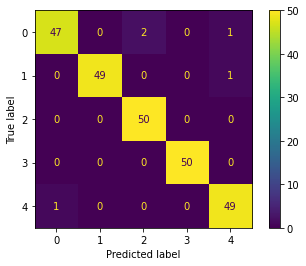

In [71]:
display_matrix(lr_cm, 'logistic regression')

 confusion matrix for model: decision tree


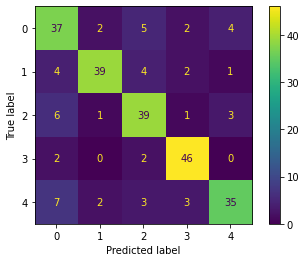

In [72]:
display_matrix(dt_cm, 'decision tree')

 confusion matrix for model: random forest


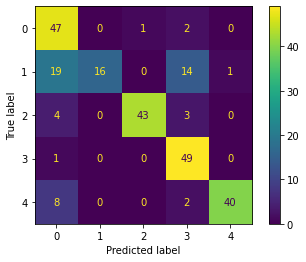

In [73]:
display_matrix(rf_cm, 'random forest')

 confusion matrix for model: K-nearest neighbors


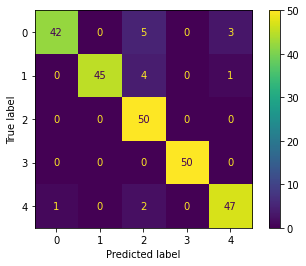

In [74]:
display_matrix(knn_cm, 'K-nearest neighbors')

 confusion matrix for model: multinomial naive bayes


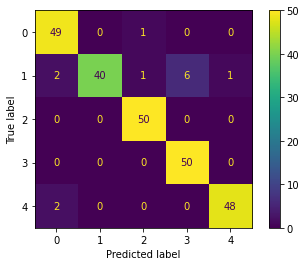

In [75]:
display_matrix(mnb_cm, 'multinomial naive bayes')

 confusion matrix for model: extreme gradient boosting


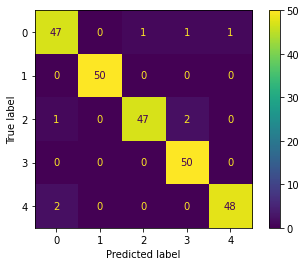

In [76]:
display_matrix(xgb_cm, 'extreme gradient boosting')

 confusion matrix for model: linear support vector machine


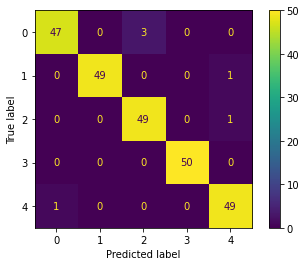

In [77]:
display_matrix(lsvc_cm, 'linear support vector machine')

 confusion matrix for model: neural network - transformer


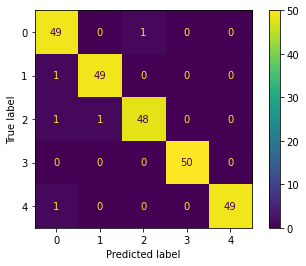

In [78]:
display_matrix(nn_transformer_cm, 'neural network - transformer')

**INSIGHT** across all metrics, logistic regression gave the best results as it had the highest scores in **accuracy**, **precision**, **recall**, and **f1 score**, while also showing near-perfect results in roc-auc and confusion matrix.

**NOTE** further hyperparameter tuning and configuration is needed for each of the models(especially DL models), so model determination process is not complete yet.

based on the results, I decided to choose logistic regression as the final model, as it provided excellent results while also being a simple and fast model to build and train.

In [79]:
determined_model = lr
lr

LogisticRegression()

# 6- Using built model to implement the solution to the problem

## 6.1 composing the question bank

In [80]:
Question_bank = train_df.append(test_df)
Question_bank = Question_bank.reset_index(drop=True)
Question_bank = Question_bank.drop(['passage_topic'], axis=1)
Question_bank

,reading_passage
0,Ad sales boost Time Warner profit\n\nQuarterly...
1,Dollar gains on Greenspan speech\n\nThe dollar...
2,Yukos unit buyer faces loan claim\n\nThe owner...
3,High fuel prices hit BA's profits\n\nBritish A...
4,Pernod takeover talk lifts Domecq\n\nShares in...
...,...
2220,BT program to beat dialler scams\n\nBT is intr...
2221,Spam e-mails tempt net shoppers\n\nComputer us...
2222,Be careful how you code\n\nA new European dire...
2223,US cyber security chief resigns\n\nThe man mak...


## 6.2 adding new passages

for example, if there are new passages to be added to the question bank, the new data must be processed and used to retrain the model, before being added to the system.

**NOTE** the data is used is drawn as a random sample from the data we already, as my intention is to show the implemention and mechansim of importing new data to the system, disregarding performance considerations as it would require scrapped data that is annotated by experts to make novel new data, and instead focus on how the new data should be managed when it gets imported to the new system

### 6.2.1 fabricating the new data (in csv format)

In [101]:
# it's only as sample of the previous data we already had
new_data = cleaned_test_df.sample(100)
new_data['passage_topic'] = new_data['passage_topic'].apply(lambda x: encoding_to_label(x))
new_data.to_csv('new_data.csv', index=False)

In [103]:
new_data

,reading_passage,passage_topic
67,stars shine on bafta red carpet hollywood sta...,entertainment
173,koubek suspended after drugs test stefan koub...,sport
146,blair 'up for it' ahead of poll tony blair sa...,politics
30,indonesia 'declines debt freeze' indonesia no...,business
174,hewitt fights back to reach final lleyton hew...,sport
...,...,...
125,parliament's record of scandal in a locked ro...,politics
63,ray dvd beats box office takings oscar-nomina...,entertainment
16,jp morgan admits us slavery links thousands o...,business
197,melzer shocks agassi in san jose second seed ...,sport


### 6.2.2 data integration

In [105]:
new_df = pd.read_csv('new_data.csv')
new_df

,reading_passage,passage_topic
0,stars shine on bafta red carpet hollywood sta...,entertainment
1,koubek suspended after drugs test stefan koub...,sport
2,blair 'up for it' ahead of poll tony blair sa...,politics
3,indonesia 'declines debt freeze' indonesia no...,business
4,hewitt fights back to reach final lleyton hew...,sport
...,...,...
95,parliament's record of scandal in a locked ro...,politics
96,ray dvd beats box office takings oscar-nomina...,entertainment
97,jp morgan admits us slavery links thousands o...,business
98,melzer shocks agassi in san jose second seed ...,sport


In [106]:
new_df = encode_class(new_df, 'passage_topic')
new_df

,reading_passage,passage_topic
0,stars shine on bafta red carpet hollywood sta...,1
1,koubek suspended after drugs test stefan koub...,3
2,blair 'up for it' ahead of poll tony blair sa...,2
3,indonesia 'declines debt freeze' indonesia no...,0
4,hewitt fights back to reach final lleyton hew...,3
...,...,...
95,parliament's record of scandal in a locked ro...,2
96,ray dvd beats box office takings oscar-nomina...,1
97,jp morgan admits us slavery links thousands o...,0
98,melzer shocks agassi in san jose second seed ...,3


In [116]:
accumulated_new_df_pt = train_df.append(test_df)
accumulated_new_df = accumulated_new_df_pt.append(new_df)
accumulated_new_df = accumulated_new_df.reset_index(drop=True)
accumulated_new_df

,reading_passage,passage_topic
0,Ad sales boost Time Warner profit\n\nQuarterly...,0
1,Dollar gains on Greenspan speech\n\nThe dollar...,0
2,Yukos unit buyer faces loan claim\n\nThe owner...,0
3,High fuel prices hit BA's profits\n\nBritish A...,0
4,Pernod takeover talk lifts Domecq\n\nShares in...,0
...,...,...
2320,parliament's record of scandal in a locked ro...,2
2321,ray dvd beats box office takings oscar-nomina...,1
2322,jp morgan admits us slavery links thousands o...,0
2323,melzer shocks agassi in san jose second seed ...,3


### 6.2.3 data processing and preparation

In [127]:
from sklearn.model_selection import train_test_split

In [120]:
accumulated_new_df['no_new_line'] = accumulated_new_df['reading_passage'].apply(lambda x: x.replace('\n', ' '))
accumulated_new_df['lower_case'] = accumulated_new_df['no_new_line'].apply(lambda x: x.lower())
accumulated_new_df['tokenization'] = accumulated_new_df['lower_case'].apply(lambda x: tokenization(x))
accumulated_new_df['no_stopwords'] = accumulated_new_df['tokenization'].apply(lambda x: remove_stopwords(x))
accumulated_new_df['lemmentization'] = accumulated_new_df['no_stopwords'].apply(lambda x: lemmatizer(x))
accumulated_new_df['tokenization'] = accumulated_new_df['tokenization'].apply(lambda x: ' '.join(x))
accumulated_new_df['no_stopwords'] = accumulated_new_df['no_stopwords'].apply(lambda x: ' '.join(x))
accumulated_new_df['lemmentization'] = accumulated_new_df['lemmentization'].apply(lambda x: ' '.join(x))
accumulated_new_df

,reading_passage,passage_topic,no_new_line,lower_case,tokenization,no_stopwords,lemmentization
0,Ad sales boost Time Warner profit\n\nQuarterly...,0,Ad sales boost Time Warner profit Quarterly p...,ad sales boost time warner profit quarterly p...,ad sales boost time warner profit quarterly p...,ad sales boost time warner profit quarterly p...,ad sales boost time warner profit quarterly p...
1,Dollar gains on Greenspan speech\n\nThe dollar...,0,Dollar gains on Greenspan speech The dollar h...,dollar gains on greenspan speech the dollar h...,dollar gains on greenspan speech the dollar h...,dollar gains on greenspan speech the dollar h...,dollar gains on greenspan speech the dollar h...
2,Yukos unit buyer faces loan claim\n\nThe owner...,0,Yukos unit buyer faces loan claim The owners ...,yukos unit buyer faces loan claim the owners ...,yukos unit buyer faces loan claim the owners ...,yukos unit buyer faces loan claim the owners ...,yukos unit buyer faces loan claim the owners ...
3,High fuel prices hit BA's profits\n\nBritish A...,0,High fuel prices hit BA's profits British Air...,high fuel prices hit ba's profits british air...,high fuel prices hit ba's profits british air...,high fuel prices hit ba's profits british air...,high fuel prices hit ba's profits british air...
4,Pernod takeover talk lifts Domecq\n\nShares in...,0,Pernod takeover talk lifts Domecq Shares in U...,pernod takeover talk lifts domecq shares in u...,pernod takeover talk lifts domecq shares in u...,pernod takeover talk lifts domecq shares in u...,pernod takeover talk lifts domecq shares in u...
...,...,...,...,...,...,...,...
2320,parliament's record of scandal in a locked ro...,2,parliament's record of scandal in a locked ro...,parliament's record of scandal in a locked ro...,parliament's record of scandal in a locked ro...,parliament's record of scandal in a locked ro...,parliament's record of scandal in a locked ro...
2321,ray dvd beats box office takings oscar-nomina...,1,ray dvd beats box office takings oscar-nomina...,ray dvd beats box office takings oscar-nomina...,ray dvd beats box office takings oscar-nomina...,ray dvd beats box office takings oscar-nomina...,ray dvd beats box office takings oscar-nomina...
2322,jp morgan admits us slavery links thousands o...,0,jp morgan admits us slavery links thousands o...,jp morgan admits us slavery links thousands o...,jp morgan admits us slavery links thousands o...,jp morgan admits us slavery links thousands o...,jp morgan admits us slavery links thousands o...
2323,melzer shocks agassi in san jose second seed ...,3,melzer shocks agassi in san jose second seed ...,melzer shocks agassi in san jose second seed ...,melzer shocks agassi in san jose second seed ...,melzer shocks agassi in san jose second seed ...,melzer shocks agassi in san jose second seed ...


In [126]:
new_processed_df = accumulated_new_df.copy()
new_processed_df['reading_passage'] = new_processed_df['lemmentization']
new_processed_df = new_processed_df[['reading_passage', 'passage_topic']]
new_processed_df

# LATER: add mechanism to prevent updating data to its processed version if it results in information loss

,reading_passage,passage_topic
0,ad sales boost time warner profit quarterly p...,0
1,dollar gains on greenspan speech the dollar h...,0
2,yukos unit buyer faces loan claim the owners ...,0
3,high fuel prices hit ba's profits british air...,0
4,pernod takeover talk lifts domecq shares in u...,0
...,...,...
2320,parliament's record of scandal in a locked ro...,2
2321,ray dvd beats box office takings oscar-nomina...,1
2322,jp morgan admits us slavery links thousands o...,0
2323,melzer shocks agassi in san jose second seed ...,3


In [133]:
X = new_processed_df['reading_passage'].values
y = new_processed_df['passage_topic'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.14, random_state=1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1999,), (326,), (1999,), (326,))

In [134]:
X_train

array(['pupils to get anti-piracy lessons  lessons on music piracy and copyright issues are to be taught to secondary school pupils in the uk.  the lessons, aimed at 11 to 14-year-olds, will introduce them to copyright - including the issues of downloading from the internet and the illegal copying of cds - and its role in protecting creativity.  music piracy, including illegally swapping music online, costs the uk music industry millions every year and has been blamed for a decline in world-wide cd sales. british music rights (bmr) - which was formed to represent the interests of songwriters and composers - worked with education experts to put together a learning pack.  songwriter guy chambers, who has worked with stars including robbie williams, has thrown his support behind the scheme. he said as well as educating children about music piracy, it would also protect young people planning a career in the music industry from "unscrupulous" individuals. at a debate in london to launch the

### 6.2.3 model retrain

In [135]:
tfv = TfidfVectorizer(ngram_range=(1,2))
X_train_new = tfv.fit_transform(X_train)
X_test_new = tfv.transform(X_test)
y_train_new = y_train
y_test_new = y_test

In [136]:
X_train_new.shape, X_test_new.shape, y_train_new.shape, y_test_new.shape

((1999, 327328), (326, 327328), (1999,), (326,))

In [137]:
lr = LogisticRegression()
lr.fit(X_train_new, y_train_new)

LogisticRegression()

In [140]:
calc_and_store_eval_scores(lr, 'logistic_regression', X_test_new, y_test_new, update=True)
preds = lr.predict(X_test_new)

Accuracy score for logistic_regression: 0.982
precision score for logistic_regression: 0.981
recall score for logistic_regression: 0.982
f1 score for logistic_regression: 0.981
Area under the curve (logistic_regression): 0.997


In [145]:
# replace deployed model with new one
determined_model = lr

### 6.2.4 replace old question bank with new one

In [143]:
Question_bank = accumulated_new_df[['reading_passage', 'passage_topic']]
Question_bank = Question_bank.drop(['passage_topic'], axis=1)
Question_bank

,reading_passage
0,Ad sales boost Time Warner profit\n\nQuarterly...
1,Dollar gains on Greenspan speech\n\nThe dollar...
2,Yukos unit buyer faces loan claim\n\nThe owner...
3,High fuel prices hit BA's profits\n\nBritish A...
4,Pernod takeover talk lifts Domecq\n\nShares in...
...,...
2320,parliament's record of scandal in a locked ro...
2321,ray dvd beats box office takings oscar-nomina...
2322,jp morgan admits us slavery links thousands o...
2323,melzer shocks agassi in san jose second seed ...


## 6.3 drawing 2 passages from the question bank

we must guarantee that the two randomly drawn passages are from different topics

In [148]:
def draw_two_passages():
    passages = Question_bank.sample(2)
    passages_processed = tfv.transform(passages['reading_passage'])
    passages_processed_preds = determined_model.predict(passages_processed)
    
    # verfication process
    print(f'passage topic encodings: {passages_processed_preds}')
    if (passages_processed_preds[0] == passages_processed_preds[1]):
        print('both passage are from the same topic!')
        return -1
        
    
    passages = passages['reading_passage'].to_list()
    passages_topic = []
    passages_topic.append(encoding_to_label(passages_processed_preds[0])) # first passage (with index 0)
    passages_topic.append(encoding_to_label(passages_processed_preds[1])) # second passage (with index 1)
    return (passages, passages_topic)

output = draw_two_passages()
while output == -1:
    print('drawing again..')
    print()
    output = draw_two_passages()
print('*' * 50)
print('drawing passages from Question Bank: DONE')
print('*' * 50)
print("", end='\n\n\n')

passages_drawn = output[0]
passages_topics = output[1]
for i in range(len(passages_topics)):
    print(f'passage number {i+1} (topic: {passages_topics[i]})')
    print(passages_drawn[i])
    print('-' * 50, end='\n\n')

passage topic encodings: [4 4]
both passage are from the same topic!
drawing again..

passage topic encodings: [1 3]
**************************************************
drawing passages from Question Bank: DONE
**************************************************



passage number 1 (topic: entertainment)
Jackson film 'absolute disaster'

A PR expert has told the Michael Jackson child abuse trial that the TV documentary at the heart of the case was an "absolute disaster".

Ann Kite told the court in the Californian town of Santa Maria she was hired to "crisis manage" the fallout after the programme had aired in 2003. Jurors saw the film, in which the pop star held hands with the alleged victim, on Tuesday. Mr Jackson denies 10 charges of child abuse and false imprisonment. If convicted, he could face up to 21 years in prison.

Ms Kite suggested Jackson's associates had been intent on launching a smear campaign against the accuser's family after the airing of Martin Bashir's film Living wi